In [1]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re
import platform

In [2]:
cwd = os.getcwd() + "/ACC"

print(cwd)

os.chdir(cwd)

if(platform.system() == 'Darwin'):
    cwd = '/Users/jm/VS Code/Python/pytorch/Fall Dectection/ACC'

/Users/jm/VS Code/Python/pytorch/Fall Dectection/ACC


In [3]:
#gets data from file specified by file_path
def get_contents(file_path):
    
    time = []
    x = []
    y = []
    z = []
    
    for file in os.listdir():
        if file.endswith(".npy"):
            file_path = f"{cwd}/{file}"
            data = np.load(file_path)

            time = data[0]
            x = data[1]
            y = data[2]
            z = data[3]
                
    df = pd.DataFrame({
        'time' : time,
        'x': x,
        'y': y,
        'z': z,
    })
    
    return df

In [4]:
dataset = get_contents(cwd)

dataset

,time,x,y,z
0,0.000000,-0.033279,-0.330460,-0.856735
1,0.010003,-0.000504,-0.346130,-0.863571
2,0.020005,0.048859,-0.360886,-0.882278
3,0.030008,0.099808,-0.384964,-0.901840
4,0.040010,0.148071,-0.408020,-0.922440
5,0.050013,0.188507,-0.415482,-0.922684
6,0.060015,0.209091,-0.419037,-0.904388
7,0.070018,0.205200,-0.430908,-0.874298
8,0.080021,0.192139,-0.449036,-0.838623
9,0.090023,0.190277,-0.462540,-0.797714


## iMed Dataset

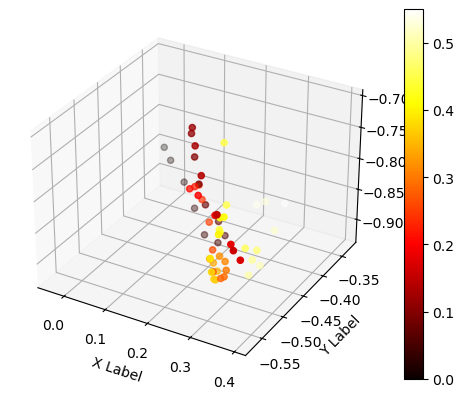

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

img = ax.scatter(dataset['x'], dataset['y'], dataset['z'], c = dataset['time'], cmap = plt.hot())
fig.colorbar(img)
plt.show()

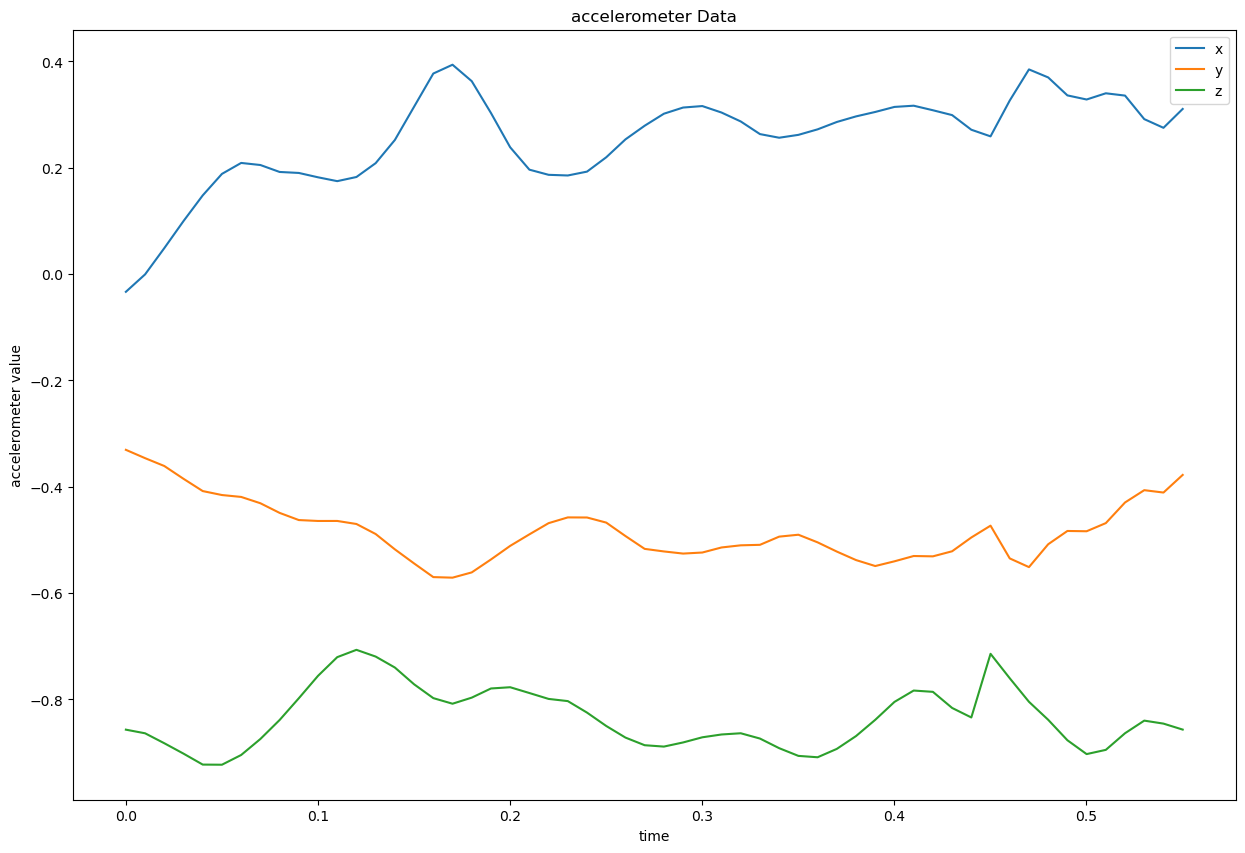

In [6]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10))

plt.plot(dataset['time'], dataset['x'], label='x')
plt.plot(dataset['time'], dataset['y'], label='y')
plt.plot(dataset['time'], dataset['z'], label='z')

plt.xlabel("time")
plt.ylabel("accelerometer value")
plt.title("accelerometer Data")

plt.legend()
plt.show()


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    56 non-null     float64
 1   x       56 non-null     float64
 2   y       56 non-null     float64
 3   z       56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


[]

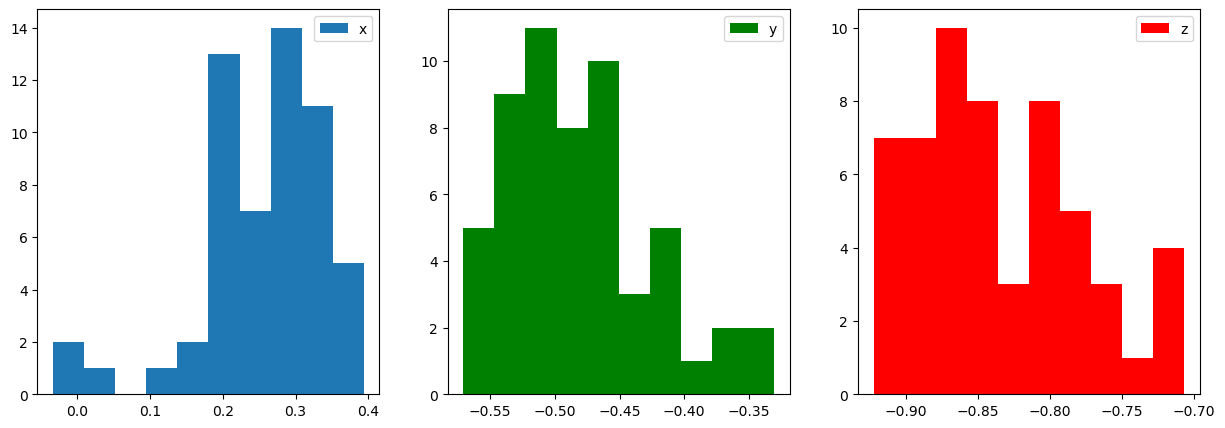

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.hist(dataset['x'], label='x')
plt.legend()
plt.subplot(1,3,2)
plt.hist(dataset['y'], color='green', label='y')
plt.legend()
plt.subplot(1,3,3)
plt.hist(dataset['z'], color='red', label='z')
plt.legend()
plt.plot()